# **Hyperparameter Tuning in Python**

## Chapter 1 - Hyperparameters and Parameters
> In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Introduction
- Parameters
    - Components of the model learned during the modeling process
    - Do not set these manually


### Extracting a Logistic Regression parameter
You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the [scikit-learn.org](https://scikit-learn.org/) documentation for the `LogisticRegression()` module under 'Attributes'.

This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

In this exercise we will extract the coefficient parameter (found in the `coef_` attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

In [35]:
credit_card = pd.read_csv('credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
credit_card.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,True,False,True,False,False,False,False,True,False,False
1,2,120000,26,-1,2,0,0,0,2,2682,...,True,False,True,False,False,False,False,False,True,False
2,3,90000,34,0,0,0,0,0,0,29239,...,True,False,True,False,False,False,False,False,True,False
3,4,50000,37,0,0,0,0,0,0,46990,...,True,False,True,False,False,False,False,True,False,False
4,5,50000,57,-1,0,-1,0,0,0,8617,...,False,False,True,False,False,False,False,True,False,False


In [36]:
from sklearn.model_selection import train_test_split

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(max_iter=1000)
log_reg_clf.fit(X_train, y_train)

# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({'Variable': original_variables,
                               'Coefficient': model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)

       Variable   Coefficient
0     LIMIT_BAL -6.977738e-07
1           AGE -2.127848e-02
2         PAY_0  1.876894e-01
3         PAY_2  1.447560e-01
4         PAY_3  1.236060e-01
5         PAY_4  1.122687e-01
6         PAY_5  1.031810e-01
7         PAY_6  9.289733e-02
8     BILL_AMT1 -5.627443e-06
9     BILL_AMT2  3.634145e-06
10    BILL_AMT3  1.024709e-06
11    BILL_AMT4 -4.802755e-07
12    BILL_AMT5  1.350610e-06
13    BILL_AMT6 -1.471955e-06
14     PAY_AMT1 -1.708411e-05
15     PAY_AMT2 -2.069216e-05
16     PAY_AMT3 -3.045951e-06
17     PAY_AMT4 -4.689321e-06
18     PAY_AMT5 -2.608703e-06
19     PAY_AMT6 -3.205912e-06
20        SEX_2 -2.366238e-02
21  EDUCATION_1 -8.339619e-03
22  EDUCATION_2 -6.633597e-03
23  EDUCATION_3 -5.410737e-04
24  EDUCATION_4 -1.058441e-03
25  EDUCATION_5 -2.372281e-03
26  EDUCATION_6 -4.097835e-05
27   MARRIAGE_1  1.690885e-02
28   MARRIAGE_2 -3.576897e-02
29   MARRIAGE_3  1.667287e-04
  Variable  Coefficient
2    PAY_0     0.187689
3    PAY_2     0.14475

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Extracting a Random Forest parameter
You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peak under the hood at what the model is doing.

In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import os
import pydot

rf_clf = RandomForestClassifier(max_depth=4, criterion='gini', n_estimators=10);
rf_clf.fit(X_train, y_train)

# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Convert tree to dot object
export_graphviz(chosen_tree,
                out_file='tree6.dot',
                feature_names=X_train.columns,
                filled=True,
                rounded=True)
(graph, ) = pydot.graph_from_dot_file('tree6.dot')

# Convert dot to png
graph.write_png('tree_viz_image.png')

# Visualize the graph using the provided image
tree_viz_image = plt.imread('tree_viz_image.png')
plt.figure(figsize = (16,10))
plt.imshow(tree_viz_image, aspect='auto');
plt.axis('off')

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print('This node split on feature {}, at a value of {}'.format(split_column_name, split_value))

### Introducing Hyperparameters
- Hyperparameters
    - Something you set before the modelling process (need to tune)
    - The algorithm does not learn these

### Exploring Random Forest Hyperparameters
Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

rf_clf_old = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2,
                                    n_estimators=5, oob_score=False, random_state=42)

rf_clf_old.fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)

# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print('Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}'.format(
    confusion_matrix(y_test, rf_old_predictions),
    accuracy_score(y_test, rf_old_predictions)
))

RandomForestClassifier(n_estimators=5, random_state=42)
Confusion Matrix: 

 [[6336  667]
 [1249  748]] 
 Accuracy Score: 

 0.7871111111111111


In [ ]:
# Create a new random forest classifier with better hyperparameters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print('Confusion Matrix: \n\n', confusion_matrix(y_test, rf_new_predictions))
print('Accuracy Score: \n\n', accuracy_score(y_test, rf_new_predictions))

Confusion Matrix: 

 [[6638  365]
 [1235  762]]
Accuracy Score: 

 0.8222222222222222


### Hyperparameters of KNN
To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.



answer form Datacamp

In [ ]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.7564444444444445, 0.7786666666666666, 0.7812222222222223


### Setting & Analyzing Hyperparameter Values


### Automating Hyperparameter Choice
Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)

    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.778111
1          0.010  0.823000
2          0.050  0.826000
3          0.100  0.825556
4          0.200  0.823333
5          0.500  0.818778


### Building Learning Curves
If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is `np.linspace(start, end, num)` which allows you to create a number of values (`num`) evenly spread within an interval (`start`, `end`) that you specify.

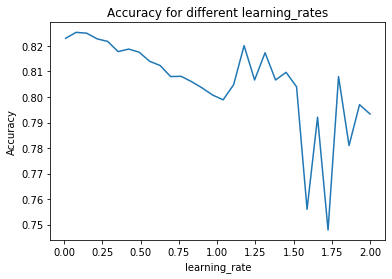

In [ ]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
    # Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results
plt.plot(learn_rates, accuracies);
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates');

You can see that for low values, you get a pretty good accuracy. However once the learning rate pushes much above 1.5, the accuracy starts to drop.

## Chapter 2 - Grid search
> This chapter introduces you to a popular automated hyperparameter tuning methodology called Grid Search. You will learn what it is, how it works and practice undertaking a Grid Search using Scikit Learn. You will then learn how to analyze the output of a Grid Search & gain practical experience doing this. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: 

In [39]:
import pandas as pd
import numpy as np
from pprint import pprint

### Introducing Grid Search

### Build Grid Search functions
In data science it is a great idea to try building algorithms, models and processes 'from scratch' so you can really understand what is happening at a deeper level. Of course there are great packages and libraries for this work (and we will get to that very soon!) but building from scratch will give you a great edge in your data science work.

In this exercise, you will create a function to take in 2 hyperparameters, build models and return results. You will use this function in a future exercise.

In [41]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

answer from datacamp

In [43]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

### Iteratively tune multiple hyperparameters
In this exercise, you will build on the function you previously created to take in 2 hyperparameters, build a model and return the results. You will now use that to loop through some values and then extend this function and loop with another hyperparameter.

In [45]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate, max_depth))
        
# Print the results
print(results_list)

[[0.01, 2, 0.8202222222222222], [0.01, 4, 0.8185555555555556], [0.01, 6, 0.8135555555555556], [0.1, 2, 0.82], [0.1, 4, 0.8194444444444444], [0.1, 6, 0.8168888888888889], [0.5, 2, 0.8155555555555556], [0.5, 4, 0.8001111111111111], [0.5, 6, 0.7881111111111111]]


In [ ]:
# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):
    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth,
                                       subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])

In [ ]:
# Create the new list to test
subsample_list = [0.4, 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        # Extend the for loop
        for subsample in subsample_list:
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print the results
pprint(results_list)

[[0.01, 2, 0.8214444444444444],
 [0.01, 4, 0.8198888888888889],
 [0.01, 6, 0.8172222222222222],
 [0.1, 2, 0.8205555555555556],
 [0.1, 4, 0.8204444444444444],
 [0.1, 6, 0.8204444444444444],
 [0.5, 2, 0.8188888888888889],
 [0.5, 4, 0.8042222222222222],
 [0.5, 6, 0.7894444444444444],
 [0.01, 2, 0.4, 0.8192222222222222],
 [0.01, 2, 0.6, 0.8208888888888889],
 [0.01, 4, 0.4, 0.8183333333333334],
 [0.01, 4, 0.6, 0.8195555555555556],
 [0.01, 6, 0.4, 0.8177777777777778],
 [0.01, 6, 0.6, 0.8196666666666667],
 [0.1, 2, 0.4, 0.821],
 [0.1, 2, 0.6, 0.8201111111111111],
 [0.1, 4, 0.4, 0.8207777777777778],
 [0.1, 4, 0.6, 0.8196666666666667],
 [0.1, 6, 0.4, 0.8155555555555556],
 [0.1, 6, 0.6, 0.8183333333333334],
 [0.5, 2, 0.4, 0.8128888888888889],
 [0.5, 2, 0.6, 0.8156666666666667],
 [0.5, 4, 0.4, 0.7945555555555556],
 [0.5, 4, 0.6, 0.8065555555555556],
 [0.5, 6, 0.4, 0.7714444444444445],
 [0.5, 6, 0.6, 0.7743333333333333]]


### Grid Search with Scikit Learn
- Steps in a Grid Search
    1. An algorithm to tune the hyperparameters (or estimator)
    2. Defining which hyperparameters to tune
    3. Defining a range of values for each hyperparameter
    4. Setting a cross-validatoin scheme
    5. Defining a score function so we can decide which square on our grid was 'the best'
    6. Include extra useful information or functions

### GridSearchCV with Scikit Learn
The `GridSearchCV` module from Scikit Learn provides many useful features to assist with efficiently undertaking a grid search. You will now put your learning into practice by creating a `GridSearchCV` object with certain parameters.

The desired options are:

- A Random Forest Estimator, with the split criterion as 'entropy'
- 5-fold cross validation
- The hyperparameters `max_depth` (2, 4, 8, 15) and `max_features` ('auto' vs 'sqrt')
- Use `roc_auc` to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parametergrid
param_grid = {
    'max_depth':[2, 4, 8, 15],
    'max_features':['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True,
    return_train_score=True
)

print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


### Understanding a grid search output


### Exploring the grid search results
You will now explore the `cv_results_` property of the GridSearchCV object defined in the video. This is a dictionary that we can read into a pandas DataFrame and contains a lot of useful information about the grid search we just undertook.

A reminder of the different column types in this property:

- `time_` columns
- `param_` columns (one for each hyperparameter) and the singular params column (with all hyperparameter settings)
- a `train_score` column for each cv fold including the mean_train_score and std_train_score columns
- a `test_score` column for each cv fold including the mean_test_score and std_test_score columns
- a `rank_test_score` column with a number from 1 to n (number of iterations) ranking the rows based on their `mean_test_score`

In [48]:
grid_rf_class.fit(X_train, y_train)

# Read the cv_results property into adataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/c

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008394      0.005662         0.000000        0.000000   
1       2.391917      0.126908         0.047261        0.007851   
2       0.004333      0.003165         0.000000        0.000000   
3       4.035311      0.146921         0.049742        0.004109   
4       0.004642      0.002176         0.000000        0.000000   
5       7.205680      0.164465         0.069315        0.003866   
6       0.009042      0.003439         0.000000        0.000000   
7      10.174682      2.017540         0.094152        0.036486   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   
4               8               auto   
5               8               sqrt   
6              15               auto   
7              15               sqrt   

                                   

### Analyzing the best results
At the end of the day, we primarily care about the best performing 'square' in a grid search. Luckily Scikit Learn's `gridSearchCV` objects have a number of parameters that provide key information on just the best square (or row in `cv_results_`).

Three properties you will explore are:

- `best_score_` – The score (here ROC_AUC) from the best-performing square.
- `best_index_` – The index of the row in `cv_results_` containing information on the best-performing square.
- `best_params_` – A dictionary of the parameters that gave the best score, for example 'max_depth': 10

In [50]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the max_depth parameter from the best-performing square and print
best_max_depth = grid_rf_class.best_params_['max_depth']
print(best_max_depth)

0.7795991402464372
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5        7.20568      0.164465         0.069315        0.003866   

  param_max_depth param_max_features  \
5               8               sqrt   

                                     params  split0_test_score  \
5  {'max_depth': 8, 'max_features': 'sqrt'}           0.782066   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
5           0.782138           0.762919  ...         0.779599        0.008779   

   rank_test_score  split0_train_score  split1_train_score  \
5                1            0.829966            0.831148   

   split2_train_score  split3_train_score  split4_train_score  \
5            0.830005            0.828884            0.829034   

   mean_train_score  std_train_score  
5          0.829808         0.000814  

[1 rows x 22 columns]
8


### Using the best results
While it is interesting to analyze the results of our grid search, our final goal is practical in nature; we want to make predictions on our test set using our estimator object.

We can access this object through the `best_estimator_` property of our grid search object.

In this exercise we will take a look inside the `best_estimator_` property and then use this to make predictions on our test set for credit card defaults and generate a variety of scores. Remember to use `predict_proba` rather than `predict` since we need probability values rather than class labels for our roc_auc score. We use a slice `[:,1]` to get probabilities of the positive class.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# See what type of object the best_estimator_property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:, 1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[1 0 0 1 0]
Confusion Matrix 
 [[6685  323]
 [1292  700]]
ROC-AUC Score 
 0.7767071783137115


The `.best_estimator_` property is a really powerful property to understand for streamlining your machine learning model building process. You now can run a grid search and seamlessly use the best model from that search to make predictions.

## Chapter 3 - Random Search
> In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/grid_vs_random.png

In [51]:
import numpy as np
import pandas as pd

### Introducting Random Search
- Similar to grid search:
    - Define an estimator, which hyperparameters to tune and the range of values for each hyperparameter.
    - Set a Cross-Validation scheme and scoring function
> Note -  This paper shows empirically and theoretically that randomly chosen trials are more efficient for hyperparmeter optimization than trials on a grid search (Bengio & Bergstra (2012))
- Two main reason:
    1. Not every hyperparameter is as important
    2. A little trick of probability

### Randomly Sample Hyperparameters
To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.

In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. Then you will randomly sample hyperparameter combinations preparation for running a random search.

You will use just the hyperparameters `learning_rate` and `min_samples_leaf` of the GBM algorithm to keep the example illustrative and not overly complicated.

In [53]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 
                                             250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)


[[1.095678391959799, 19], [1.5, 31], [1.0582412060301507, 14], [1.3876884422110551, 29], [0.8785427135678392, 15], [1.07321608040201, 37], [0.8111557788944723, 23], [0.4592462311557789, 23], [1.3802010050251257, 22], [0.42180904522613066, 38], [0.7063316582914573, 38], [1.2529145728643216, 29], [1.0657286432160804, 20], [0.07738693467336683, 17], [0.668894472361809, 27], [0.2121608040201005, 36], [1.4625628140703517, 28], [0.04743718592964824, 29], [0.4891959798994975, 37], [1.4326130653266331, 19], [0.20467336683417087, 16], [0.31698492462311556, 32], [0.8860301507537688, 13], [0.6089949748743718, 25], [0.11482412060301507, 10], [1.3951758793969848, 23], [1.013316582914573, 22], [1.5, 34], [0.9159798994974874, 14], [0.01, 29], [1.3203015075376885, 32], [0.796180904522613, 26], [0.9084924623115578, 14], [1.3951758793969848, 16], [0.6464321608040201, 22], [0.36939698492462314, 34], [0.039949748743718594, 21], [0.4592462311557789, 36], [1.4176381909547737, 17], [0.15226130653266332, 35],

### Randomly Search with Random Forest
To solidify your knowledge of random sampling, let's try a similar exercise but using different hyperparameters and a different algorithm.

As before, create some lists of hyperparameters that can be zipped up to a list of lists. You will use the hyperparameters `criterion`, `max_depth` and `max_features` of the random forest algorithm. Then you will randomly sample hyperparameter combinations in preparation for running a random search.

In [55]:
import random
from itertools import product

# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2', None]

# Create a list of values for the max_dep hyperparameter
max_depth_list = list(range(3, 56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)


[['gini', 'auto', 53], ['gini', 'log2', 53], ['entropy', 'sqrt', 49], ['gini', None, 36], ['gini', 'log2', 15], ['gini', None, 12], ['gini', 'sqrt', 53], ['gini', 'log2', 48], ['entropy', 'log2', 53], ['gini', None, 29], ['gini', None, 6], ['gini', 'log2', 26], ['gini', None, 5], ['gini', 'log2', 9], ['entropy', 'log2', 20], ['gini', 'sqrt', 6], ['entropy', 'log2', 22], ['gini', 'log2', 21], ['entropy', None, 12], ['gini', 'auto', 13], ['entropy', 'sqrt', 20], ['gini', 'log2', 39], ['gini', None, 45], ['entropy', 'auto', 13], ['gini', 'auto', 16], ['gini', None, 50], ['gini', 'auto', 36], ['entropy', 'auto', 55], ['gini', None, 17], ['entropy', 'log2', 48], ['gini', None, 48], ['gini', 'sqrt', 16], ['gini', 'log2', 40], ['gini', 'sqrt', 41], ['entropy', 'auto', 37], ['gini', 'auto', 26], ['gini', 'sqrt', 14], ['entropy', 'sqrt', 10], ['gini', 'sqrt', 18], ['gini', 'sqrt', 43], ['gini', None, 20], ['entropy', 'auto', 16], ['entropy', 'auto', 38], ['gini', 'auto', 10], ['gini', 'auto', 3

### Visualizing a Random Search
Visualizing the search space of random search allows you to easily see the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.

In this exercise you will use several different samples of hyperparameter combinations and produce visualizations of the search space.

The function `sample_and_visualize_hyperparameters()` takes a single argument (number of combinations to sample) and then randomly samples hyperparameter combinations, just like you did in the last exercise! The function will then visualize the combinations.

In [56]:
import matplotlib.pyplot as plt

def sample_and_visualize_hyperparameters(n_samples):
    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot 
    plt.clf() 
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 1.5])
    plt.gca().set_ylim([10, 29])

4000


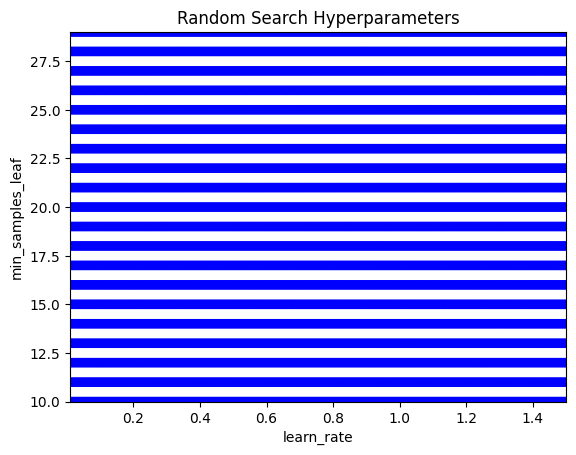

In [58]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

4000


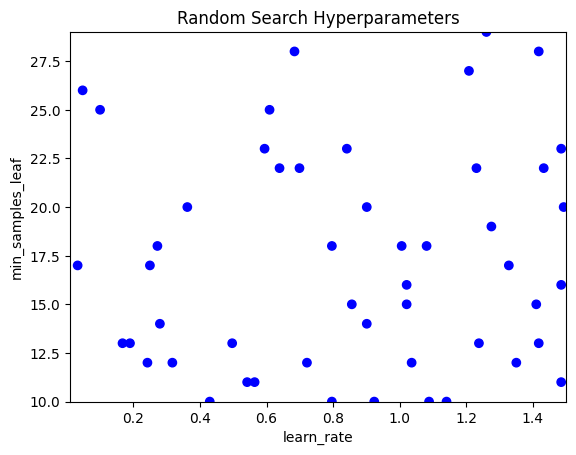

In [57]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10, 30))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(50)

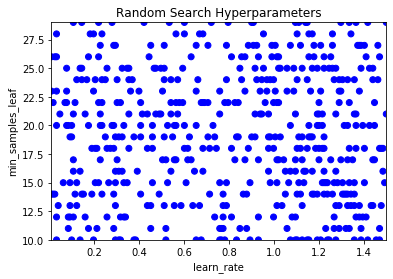

In [ ]:
# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(500)

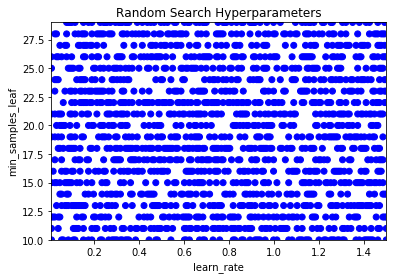

In [ ]:
# Sample and visualize specified combinations
sample_and_visualize_hyperparameters(1500)

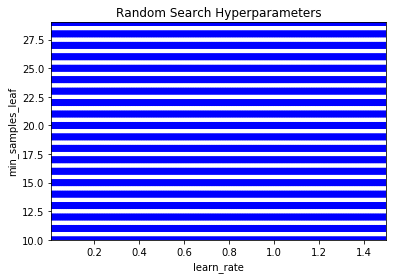

In [ ]:
# Sample all the hyperparameter combinations & visualize
sample_and_visualize_hyperparameters(number_combs)

### Random Search in Scikit Learn
- Comparing to GridSearchCV
    1. Decide an algorithm/estimator
    2. Define which hyperparameters we will tune
    3. Define a range of values for each hyperparameter
    4. Setting a Cross-Validation scheme
    5. Define a score function
    6. Include extra useful information or function
- In Random Search,
    7. Decide how many samples to take and sample it

### The RandomizedSearchCV Object
Just like the `GridSearchCV` library from Scikit Learn, `RandomizedSearchCV` provides many useful features to assist with efficiently undertaking a random search. You're going to create a `RandomizedSearchCV` object, making the small adjustment needed from the `GridSearchCV` object.

The desired options are:

- A default Gradient Boosting Classifier Estimator
- 5-fold cross validation
- Use accuracy to score the models
- Use 4 cores for processing in parallel
- Ensure you refit the best model and return training scores
- Randomly sample 10 models

The hyperparameter grid should be for `learning_rate` (150 values between 0.1 and 2) and `min_samples_leaf` (all values between and including 20 and 64).

In [60]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 
              'min_samples_leaf': list(range(20, 65))}

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy', n_jobs=4, cv=5, refit=True, return_train_score=True
)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.9671140939597315 0.3422818791946309 0.8395973154362416
 1.8979865771812081 1.0053691275167784 1.1456375838926176
 1.6302013422818793 1.0691275167785235 1.0691275167785235
 1.6174496644295302]
[54 61 42 61 24 48 46 50 35 23]


### RandomizedSearchCV in Scikit Learn
Let's practice building a `RandomizedSearchCV` object using Scikit Learn.

The hyperparameter grid should be for `max_depth` (all values between and including 5 and 25) and `max_features` ('auto' and 'sqrt').

The desired options for the `RandomizedSearchCV` object are:

- A RandomForestClassifier Estimator with `n_estimators` of 80.
- 3-fold cross validation (`cv`)
- Use `roc_auc` to score the models
- Use 4 cores for processing in parallel (`n_jobs`)
- Ensure you refit the best model and return training scores
- Only sample 5 models for efficiency (`n_iter`)

Remember, to extract the chosen hyperparameters these are found in `cv_results_` with a column per hyperparameter. For example, the column for the hyperparameter `criterion` would be `param_criterion`.

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid
param_grid = {'max_depth': list(range(5, 26)), 'max_features': ['auto', 'sqrt']}

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_estimators=80),
    param_distributions=param_grid, n_iter=5,
    scoring='roc_auc', n_jobs=4, cv=3, refit=True, return_train_score=True
)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
12 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/c

[10 11 25 18 22]
['auto' 'auto' 'auto' 'auto' 'sqrt']


### Comparing Grid and Random Search
- Comparision

| Grid Search | Random Search |
| ----------- | ------------- |
| Exhaustively tries all combinations within the sample space | Random Selects a subset of combinations within the sample space (that you must specify) |
| No sampling methodology | Can select a sampling methodology (other than uniform) |
| More computationally expensive | Less computationally expensive |
| Guaranteed to find the best score in the sample space | Not guaranteed to find the best score in the sample space (but likely to find a good one fater) |

### Grid and Random Search Side by Side
Visualizing the search space of random and grid search together allows you to easily see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.

In this exercise, you will sample hyperparameter combinations in a grid search way as well as a random search way, then plot these to see the difference.

In [63]:
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
    plt.gca().set_xlim([0.01, 3.0])
    plt.gca().set_ylim([5, 25])

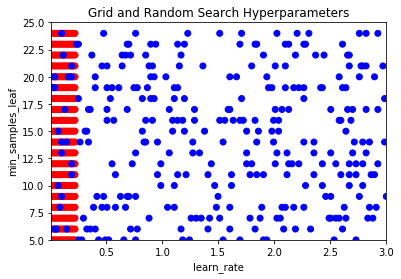

In [ ]:
learn_rate_list = np.linspace(0.01, 3.0, 200)
min_samples_leaf_list = range(5, 25)

combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0, len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

## Chapter 4 - Informed Search
> In this final chapter you will be given a taste of more advanced hyperparameter tuning methodologies known as ''informed search''. This includes a methodology known as Coarse To Fine as well as Bayesian & Genetic hyperparameter tuning algorithms. You will learn how informed search differs from uninformed search and gain practical skills with each of the mentioned methodologies, comparing and contrasting them as you go. This is the Summary of lecture "Hyperparameter Tuning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/acc_for_lr.png

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Informed Search - Coarse to Fine
- Coarse to fine tuning
    1. Random search
    2. Find promising areas
    3. Grid search in the smaller area
    4. Continue until optimal score obtained
- Why Coarse to Fine?
    - Utilizes the advantanges of grid and random search
        - Wide search to begin with
        - Deeper search once you know where a good spot is likely to be
    - Better spending of time and computational efforts mean you can iterate quicker
    

### Visualizing Coarse to Fine
You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

In [69]:
def visualize_hyperparameter(name):
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])

11000
    max_depth  min_samples_leaf  learn_rate  accuracy
1          10                14    0.477450        97
4           6                12    0.771275        97
2           7                14    0.050067        96
3           5                12    0.023356        96
5          13                11    0.290470        96
6           6                10    0.317181        96
7          19                10    0.757919        96
8           2                16    0.931544        96
9          16                13    0.904832        96
10         12                13    0.891477        96
Index(['max_depth', 'min_samples_leaf', 'learn_rate', 'accuracy'], dtype='object')


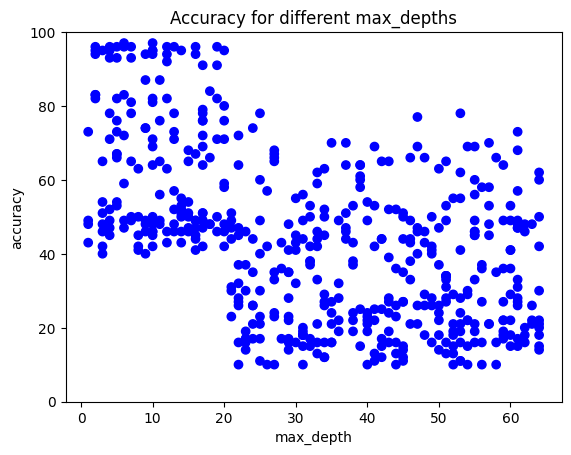

In [70]:
from itertools import product

max_depth_list = range(1, 6)
min_samples_leaf_list = range(3, 14)
learn_rate_list = np.linspace(0.01, 1.33, 200)

combinations_list = [list(x) for x in product(max_depth_list, 
                                              min_samples_leaf_list, 
                                              learn_rate_list)]

results_df = pd.read_csv('results_df.csv')

# Confirm the size fo the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')

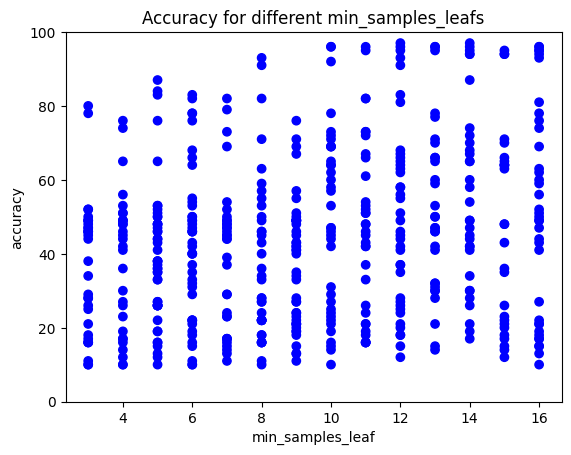

In [71]:
visualize_hyperparameter('min_samples_leaf')

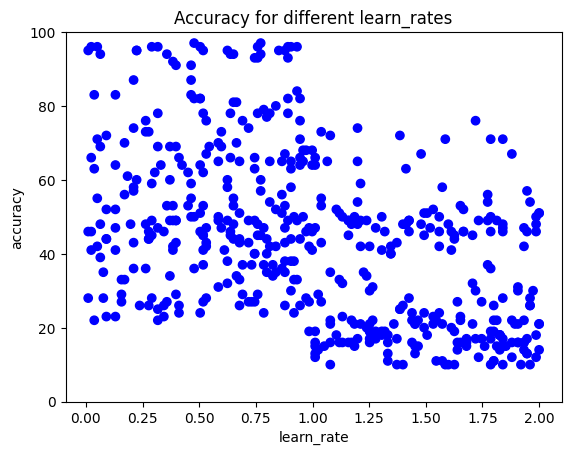

In [72]:
visualize_hyperparameter('learn_rate')

We have undertaken the first step of a Coarse to Fine search. Results clearly seem better when `max_depth` is below 20. learn_rates smaller than 1 seem to perform well too. There is not a strong trend for `min_samples` leaf though.

### Coarse to Fine Iterations
You will now visualize the first random search undertaken, construct a tighter grid and check the results.

In [73]:
def visualize_first():
    for name in results_df.columns[0:2]:
        plt.clf()
        plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        x_line = 20
        if name == "learn_rate":
            x_line = 1
        plt.axvline(x=x_line, color="red", linewidth=4)

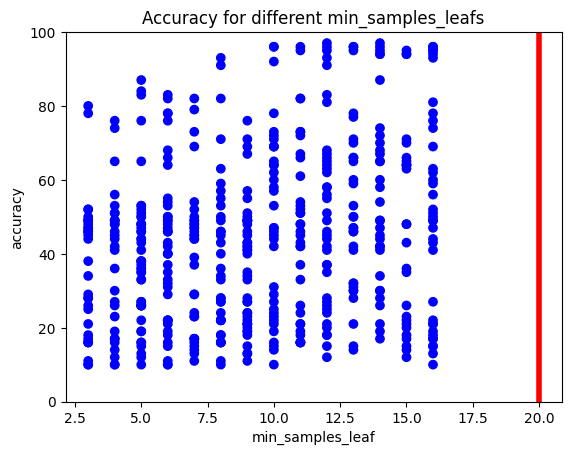

In [74]:
# Use the provided function to visualize the first results
visualize_first()

In [ ]:
def visualize_second():
    for name in results_df2.columns[0:2]:
        plt.clf()
        plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        x_line = 20
        if name == "learn_rate":
            x_line = 1
        plt.axvline(x=x_line, color="red", linewidth=4)

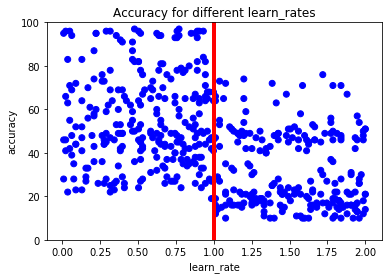

In [ ]:
# Create some combination lists & combine
max_depth_list = list(range(1, 21))
learn_rate_list = np.linspace(0.001, 1, 50)

results_df2 = pd.read_csv('./dataset/results_df2.csv')

visualize_second()

### Informed Search - Bayesian Statistics
- Bayes rule
    - A statistical method of using new evidence to iteratively update our beliefs about some outcome
$$ P(A \vert B) = \frac{P(B \vert A) P(A)}{P(B)} $$
    - LHS = the probability of A given B has occurred. B is some new evidence (**Posterior**)
    - RHS = how to calculate LHS
        - $P(A)$ is the **'prior'**. The initial hypothesis about the event. 
        - $P(A\vert B)$ is the probability given new evidence
        - $P(B)$ is the **'marginal likelihood'**. It is the probability of observing this new evidence
        - $P(B \vert A)$ is the **likelihood** which is the probability of observing the evidence, given the event we care about
- Bayes in Hyperparameter Tuning
    - Pick a hyperparameter combination
    - Build a model
    - Get new evidence (the score of the model)
    - Update our belief and chose better hyperparamters next round

### Bayes Rule in Python
In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close their account for your online software product.

These are the probabilities we know:

- 7% (0.07) of people are likely to close their account next month
- 15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
- 35% (0.35) of people who are likely to close their account are unhappy with your product

In [ ]:
# Assign probabilities to variables
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probability someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

0.16333333333333336


### Bayesian Hyperparameter tuning with Hyperopt
In this example you will set up and run a bayesian hyperparameter optimization process using the package `Hyperopt`. You will set up the domain (which is similar to setting up the grid for a grid search), then set up the objective function. Finally, you will run the optimizer over 20 iterations.

You will need to set up the domain using values:

- `max_depth` using quniform distribution (between 2 and 10, increasing by 2)
- `learning_rate` using uniform distribution (0.001 to 0.9)

Note that for the purpose of this exercise, this process was reduced in data sample size and hyperopt & GBM iterations. If you are trying out this method by yourself on your own machine, try a larger search space, more trials, more cvs and a larger dataset size to really see this in action!

> Note: This session requires `Hyperopt` packages

In [ ]:
from sklearn.model_selection import train_test_split

credit_card = pd.read_csv('./dataset/credit-card-full.csv')
# To change categorical variable with dummy variables
credit_card = pd.get_dummies(credit_card, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

X = credit_card.drop(['ID', 'default payment next month'], axis=1)
y = credit_card['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
import hyperopt as hp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Set up space dictionary with specified hyperparamters
space = {'max_depth': hp.hp.quniform('max_depth', 2, 10, 2),
         'learning_rate': hp.hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params)
    best_score = cross_val_score(gbm_clf, X_train, y_train, 
                                 scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = hp.fmin(fn=objective, space=space, max_evals=20, 
               rstate=np.random.RandomState(42), algo=hp.tpe.suggest)
print(best)

100%|██████████| 20/20 [02:16<00:00,  6.83s/trial, best loss: 0.18080952380952375]
{'learning_rate': 0.0128515490384306, 'max_depth': 6.0}


### Informed Search - Genetic Algorithms
- Genetics in Machine Learning
    1. Create some models (that have hyperparameter settings)
    2. Pick the best (by our scoring function)
    : these are the ones that "survive"
    3. Create new models that are similar to the best ones
    4. Add in some randomness so we don't reach a local optimum
    5. Repeat until we are happy!
- Advantages
    - It allows us to learn from previous iterations, just like bayesian hyperparameter tuning
    - It has the additional advantage of some randomness
    - Takes care of many tedious aspects of machine learning

### Genetic Hyperparameter Tuning with TPOT
You're going to undertake a simple example of genetic hyperparameter tuning. `TPOT` is a very powerful library that has a lot of features. You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.

This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would have a much larger population and offspring size as well as hundreds more generations to find a good model.

You will create the estimator, fit the estimator to the training data and then score this on the test data.

For this example we wish to use:

- 3 generations
- 4 in the population size
- 3 offspring in each generation
- `accuracy` for scoring

> Note: This session requires `tpot` packages

In [ ]:
from tpot import TPOTClassifier

# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.8204285714285714
Generation 2 - Current best internal CV score: 0.8204285714285714
Generation 3 - Current best internal CV score: 0.8204285714285714
Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=1, min_samples_leaf=10, min_samples_split=9)
0.8176666666666667


You can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over each generation, and then the final accuracy score with the hyperparameters chosen for the final model. This is a great first example of using TPOT for automated hyperparameter tuning.

### Analysing TPOT's stability
You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.



In [ ]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3,
                          scoring='accuracy', cv=2, verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.8213809523809524
Generation 2 - Current best internal CV score: 0.8213809523809524
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.45)
0.8195555555555556


In [ ]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3,
                          scoring='accuracy', cv=2, verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.7811904761904762
Generation 2 - Current best internal CV score: 0.7811904761904762
Best pipeline: LogisticRegression(input_matrix, C=0.5, dual=False, penalty=l2)
0.7724444444444445


In [ ]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3,
                          scoring='accuracy', cv=2, verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.7960476190476191
Generation 2 - Current best internal CV score: 0.8049523809523809
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=3, max_features=0.6000000000000001, min_samples_leaf=15, min_samples_split=17, n_estimators=100, subsample=0.6000000000000001)
0.812


You can see that TPOT is quite unstable when only running with low generations, population size and offspring. The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the generations, population size and offspring and running this for a long time will assist to produce better models and more stable results.